In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
# import sklearn
# import blur_detector

In [2]:
image = cv2.imread('C:/Users/hrshv/Documents/OpenCV-intestinal-deformations/testimages/23-01-23_APN017_RNAi_24HRS_L4440_PA14_20X_2b(1).tif' )
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


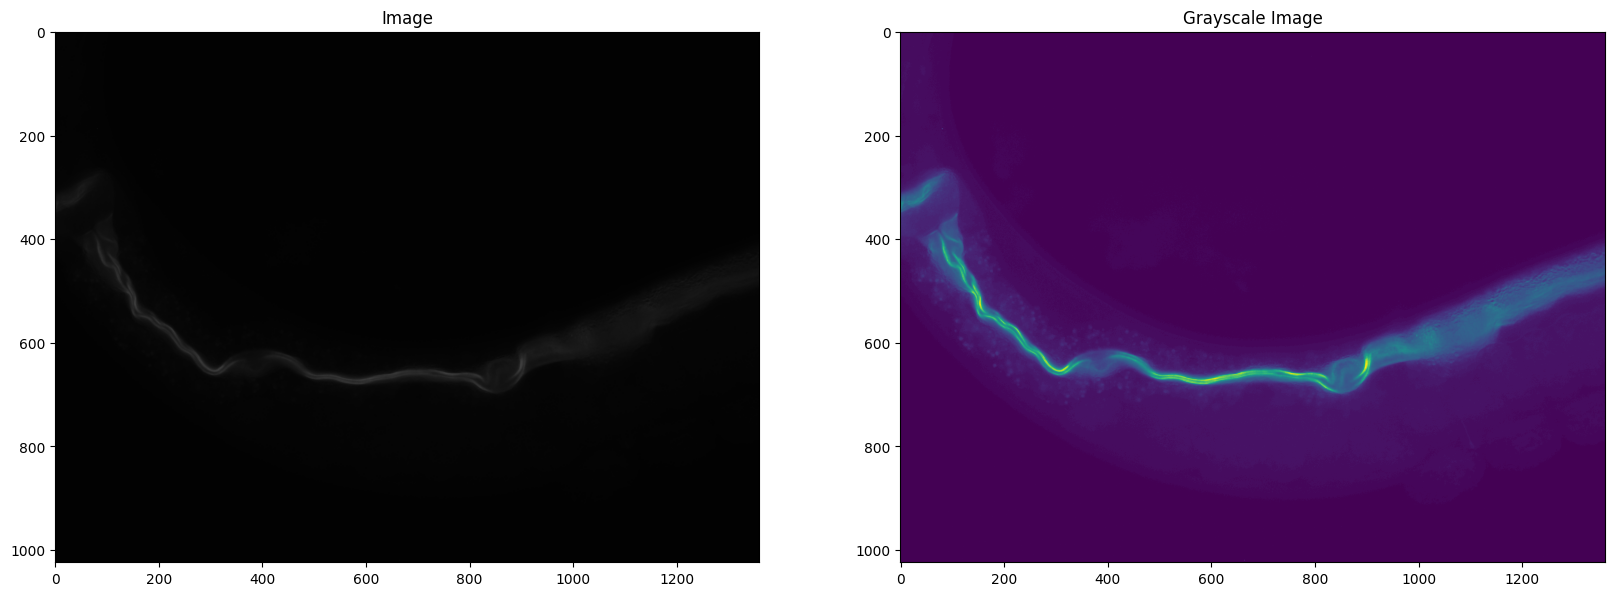

In [3]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title("Image")
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.title("Grayscale Image")
plt.imshow(gray)

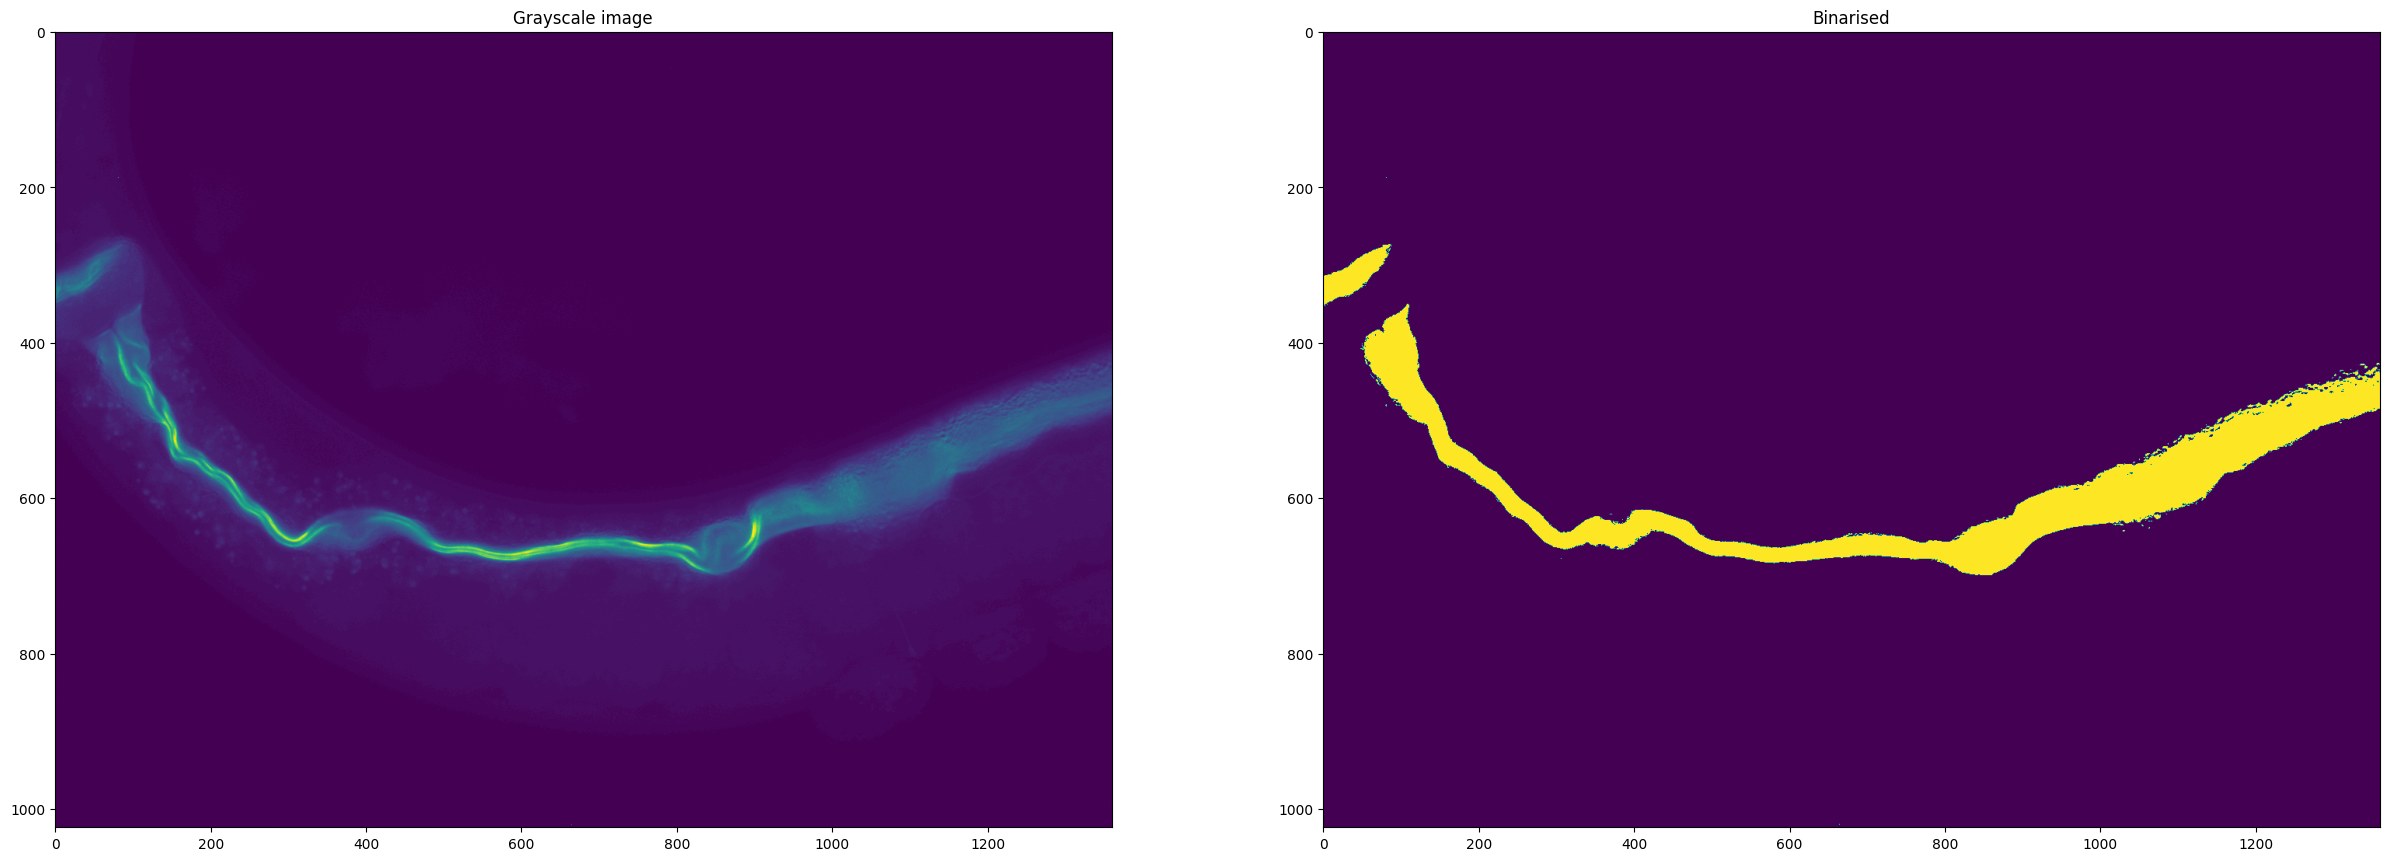

In [4]:
plt.figure(figsize=(30, 30))
plt.subplot(2, 2, 1)
plt.title("Grayscale image")
plt.imshow(gray)

# thres = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thres = cv2.threshold(gray, 13, 255, cv2.THRESH_BINARY)[1]

plt.subplot(2, 2, 2)
plt.title("Binarised")
plt.imshow(thres)
plt.show()

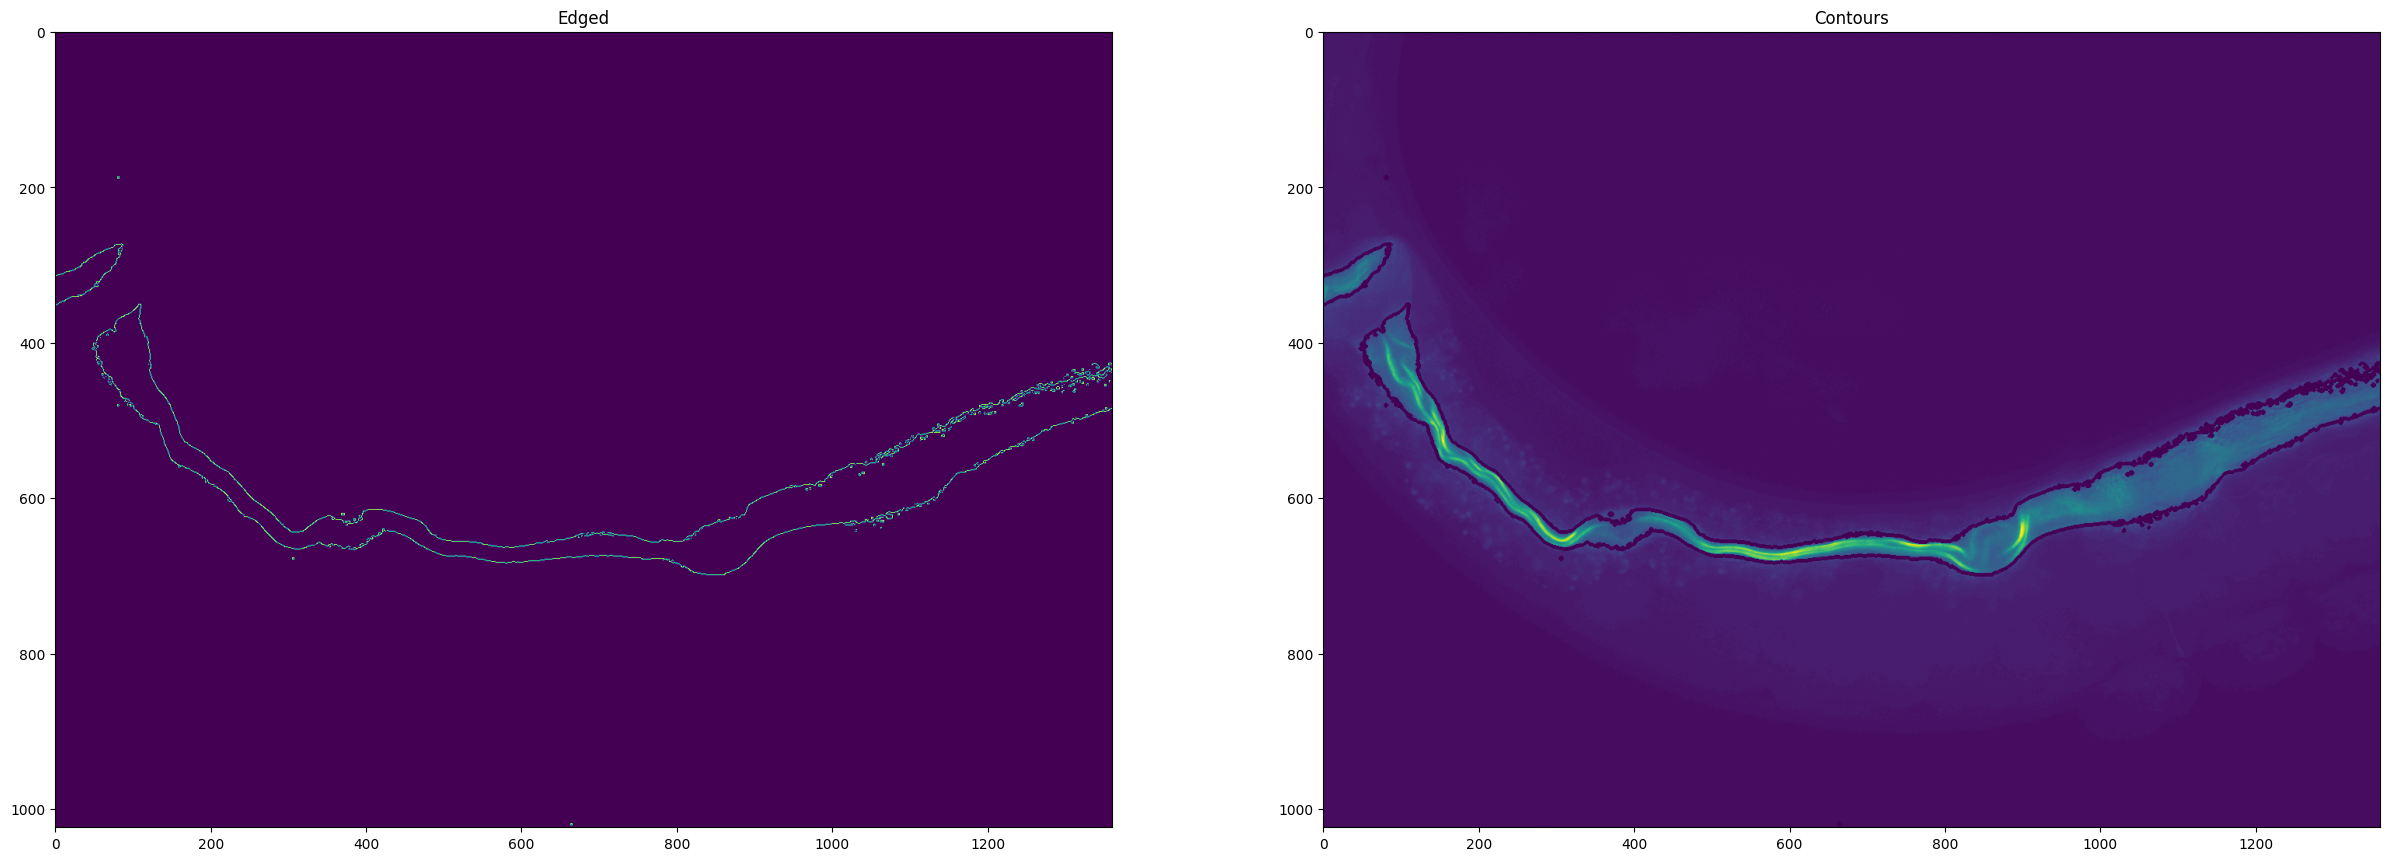

In [5]:
edged = cv2.Canny(thres, 30, 200)
plt.figure(figsize=(30, 30))
plt.subplot(2, 2, 1)
plt.title("Edged")
plt.imshow(edged)



# Finding Contours
# We use a copy of your image e.g. edged.copy(), since findContours alters the image
_1 = edged.copy()
contours, hierarchy = cv2.findContours(_1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

ctrpoints = np.vstack(contours).squeeze()

cv2.drawContours(gray, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 2)
plt.title("Contours")
plt.imshow(gray)

In [21]:
vx, vy, x0, y0 = cv2.fitLine(ctrpoints, cv2.DIST_L2, 0, 0.01, 0.01)

# where (vx, vy) is a normalized vector collinear to the line and (x0, y0) is a point on the line.

print(vx, vy)
print(x0,y0)

[0.99952453] [0.03083377]
[705.5826] [556.06445]


In [ ]:
# plt.figure(figsize=(30, 30))
# _ = image.copy()

# for c in contours:
#     x,y,w,h = cv2.boundingRect(c)
#     # x,y,w,h = cv2.minAreaRect(c)
#     cv2.rectangle(_,(x,y),(x+w,y+h),(0,0,255),0)
    

# plt.subplot(3, 2, 1)
# plt.title("Bounded Rectangles")
# plt.imshow(_)

In [ ]:
plt.figure(figsize=(30, 30))
_1 = image.copy()

for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.001 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(_1, [approx], 0, (0, 255, 0), 2)
    
plt.subplot(3, 3, 1)
plt.title("Approx Poly DP 0.001")
plt.imshow(_1)

for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.2 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(_1, [approx], 0, (0, 255, 0), 2)

plt.subplot(3, 3, 2)
plt.title("Approx Poly DP 0.2")
plt.imshow(_1)


In [ ]:
plt.figure(figsize=(30, 30))
_x = image.copy()

# Sort Contors by area and then remove the largest frame contour
# n = len(contours) - 1
# contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(_x, [hull], 0, (0, 255, 0), 2)

plt.subplot(1, 1, 1)
plt.title("Convex Hull")
plt.imshow(_x)


In [ ]:

# Calculate the Laplacian of the image
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize = 7)

# Calculate the variance of the Laplacian at each point
variance = np.var(laplacian)

# Threshold the variance values to create a binary mask
threshold = 0
mask = np.zeros(image.shape, dtype=np.uint8)
mask[variance < threshold] = 0

# Convert the binary mask to a color map
heatmap = cv2.applyColorMap(mask, cv2.COLORMAP_JET)

# Display the heatmap
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Laplacian")
plt.imshow(laplacian)

# Display the heatmap
plt.subplot(2, 2, 2)
plt.title("Heatmap")
plt.imshow(mask)

In [ ]:
# image = cv2.imread('testimages/23-01-23_APN017_RNAi_24HRS_L4440_PA14_20X_2b(1).tif')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# if __name__ == '__main__':
#     # img = cv2.imread('image_name', 0)
#     blur_map = blur_detector.detectBlur(gray, downsampling_factor=4, num_scales=1, scale_start=2, num_iterations_RF_filter=4)
#     # cv2.imshow('ori_img', image)

# plt.figure(figsize=(30, 30))

# plt.subplot(3, 2, 1)
# plt.title("grayscale")
# plt.imshow(gray)

# plt.subplot(3, 2, 2)
# plt.title("Blur Map")
# plt.imshow(blur_map)

# plt.subplot(3, 2, 3)
# plt.title("Image")
# plt.imshow(image)

# print(blur_map.var())
# plt.show()

In [ ]:
# # Otsu's blurring for the normal image
# plt.figure(figsize=(30, 30))
# plt.subplot(3, 2, 1)
# plt.title("Grayscale image")
# plt.imshow(blur_map)


# # Convert the image to uint8
# blur_map_uint8 = cv2.convertScaleAbs(blur_map)


# # Apply Otsu's thresholding
# blur_thres = cv2.threshold(blur_map_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# blur_thres_bin = cv2.threshold(blur_map_uint8, 0, 255, cv2.THRESH_BINARY)[1]
# # blur_thres_bin = cv2.adaptiveThreshold(blur_map_uint8, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 3) 
# # blur_thres = cv2.threshold(blur_map, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


# plt.subplot(3, 2, 2)
# plt.title("Otsu's Binarised")
# plt.imshow(blur_thres)

# plt.subplot(3, 2, 3)
# plt.title("Binarised")
# plt.imshow(blur_thres_bin)

# plt.show()


In [ ]:
# plt.figure(figsize=(30, 30))
# plt.subplot(3, 2, 1)
# plt.title("Grayscale")
# plt.imshow(thres)

# plt.subplot(3, 2, 2)
# plt.title("Otsu's on Blur Map")
# plt.imshow(blur_map_thres)

# img1 = thres
# img2 = blur_map_thres

# diff = img1 - img2

# # diff
# plt.subplot(3, 2, 3)
# plt.title("Difference")
# plt.imshow(diff)
# plt.show()


In [ ]:
# plt.figure(figsize=(20, 20))

# # Find Canny edges
# edged = cv2.Canny(image, 30, 200)

# plt.subplot(2, 2, 2)
# plt.title("Canny Edges")
# plt.imshow(edged)
# # 

# # Finding Contours
# # Use a copy of your image e.g. edged.copy(), since findContours alters the image
# contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# plt.subplot(2, 2, 3)
# plt.title("Canny Edges After Contouring")
# plt.imshow(edged)

# print("Number of Contours found = " + str(len(contours)))

# # Draw all contours
# # Use '-1' as the 3rd parameter to draw all
# cv2.drawContours(image, contours, -1, (0,255,0), 3)

# plt.subplot(2, 2, 4)
# plt.title("Contours")
# plt.imshow(image)

In [ ]:
# # blur_map_thres
# #

# kernel = cv2.getGaussianKernel(1000, 4)


# sharpen_kernel = np.array([[-1,-1,-1], 
#                            [-1,30,-1], 
#                            [-1,-1,-1]])
# sharpen = cv2.filter2D(image, -1, sharpen_kernel)

# deblurred = cv2.filter2D(gray, -1, kernel)

# laplacian = cv2.Laplacian(image, cv2.CV_64F)
# laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()

# print(gray.var())
# print(sharpen.var())

# plt.figure(figsize=(30, 30))
# plt.subplot(3, 2, 1)
# plt.title("Grayscale")
# plt.imshow(gray)

# plt.subplot(3, 2, 2)
# plt.title("sharpened")
# plt.imshow(sharpen)

# plt.subplot(3, 2, 3)
# plt.title("Deblurred")
# plt.imshow(deblurred)

# plt.show()



Contours and approximating contours

approximating contours

measuring based on conditions